In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('~/Downloads/MxMH.csv')
df.describe(include='all')
df.columns
df['Primary streaming service'] = df['Primary streaming service'].replace({
    'I do not use a streaming service.': 'None',
    'Other streaming service': 'Other'
})
df['Age Group'] = pd.cut(df['Age'],
                         bins=[0, 19, 29, 39, 49, 59, 100],
                         labels=['10-19', '20-29', '30-39', '40-49', '50-59', '60+'])
df['Hours per day Group'] = pd.cut(df['Hours per day'],
                         bins=[0, 4, 9, 14, 19, 24],
                         labels=['0-4', '5-9', '10-14', '15-19', '20-24'])
df['Overall MH'] = df['Anxiety'] + df['Depression'] + df['OCD'] + df['Insomnia']
df

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions,Age Group,Hours per day Group,Overall MH
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.,10-19,0-4,4.0
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.,60+,0-4,12.0
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.,10-19,0-4,26.0
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Never,9.0,7.0,3.0,3.0,Improve,I understand.,60+,0-4,22.0
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.,10-19,0-4,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,...,Never,7.0,6.0,0.0,9.0,Improve,I understand.,10-19,0-4,22.0
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,...,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.,10-19,0-4,12.0
733,11/3/2022 23:24:38,19.0,Other,6.0,Yes,No,Yes,Rap,Yes,No,...,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.,10-19,5-9,8.0
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,...,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.,10-19,5-9,8.0


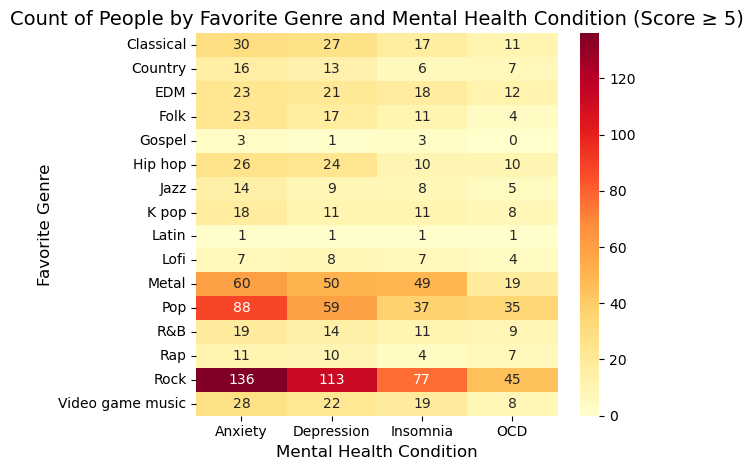

In [3]:
conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
genre_data = {}

for condition in conditions:
    filtered = df[df[condition] >= 5]
    genre_counts = filtered['Fav genre'].value_counts()
    genre_data[condition] = genre_counts

df_plot = pd.DataFrame(genre_data).fillna(0)

sns.heatmap(df_plot, annot=True, fmt='g', cmap='YlOrRd')
plt.title('Count of People by Favorite Genre and Mental Health Condition (Score ≥ 5)', fontsize=14)
plt.ylabel('Favorite Genre', fontsize=12)
plt.xlabel('Mental Health Condition', fontsize=12)
plt.tight_layout()
plt.show()

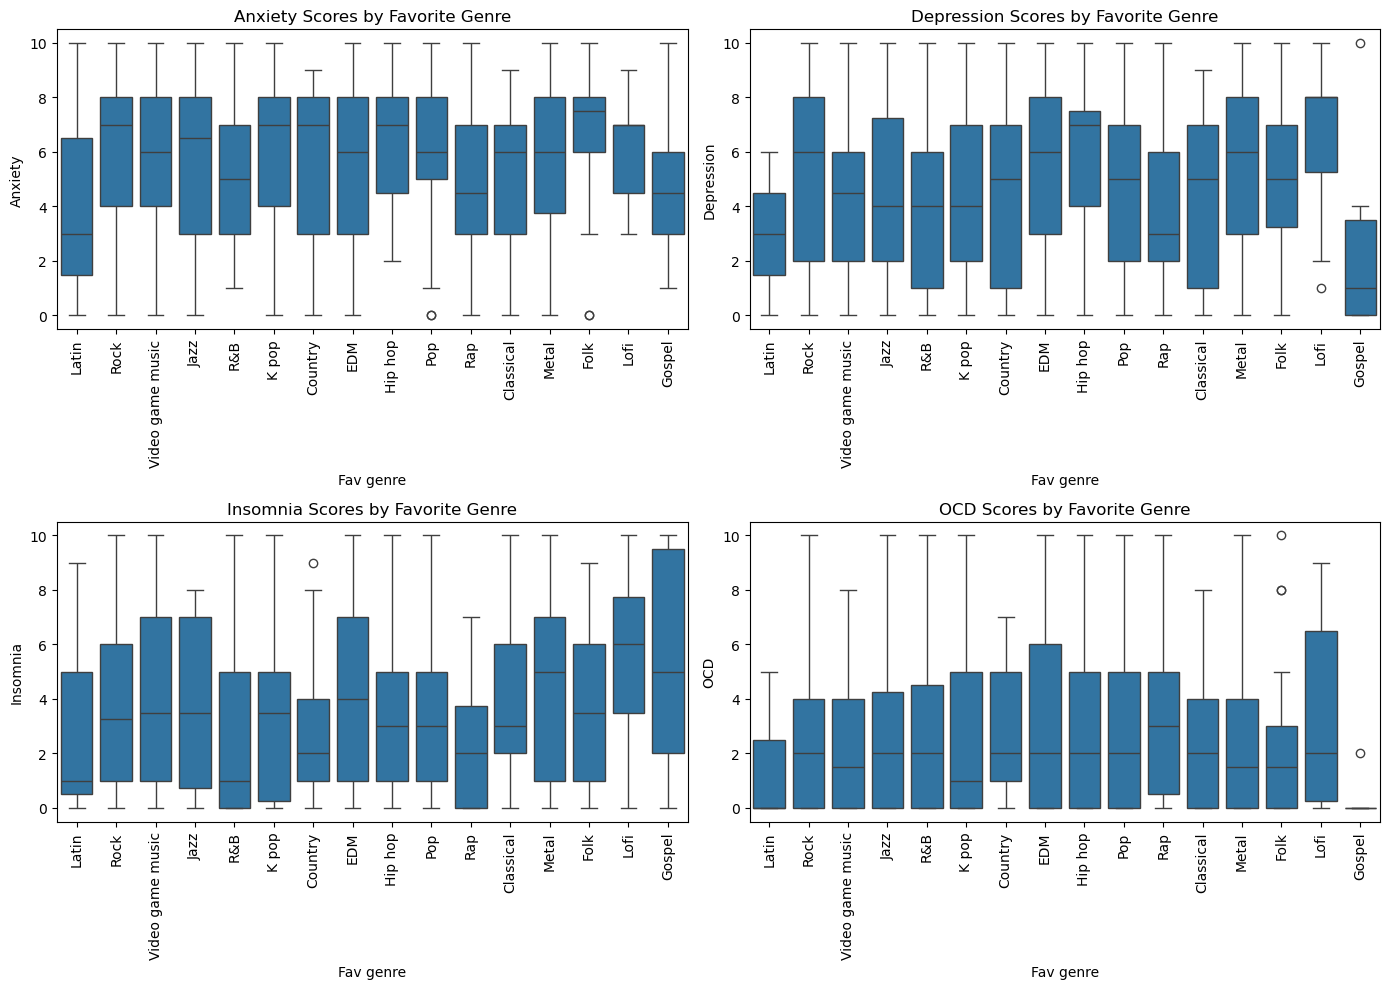

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']

for i, condition in enumerate(conditions):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df, x='Fav genre', y=condition, ax=ax)
    ax.set_title(f'{condition} Scores by Favorite Genre')
    ax.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

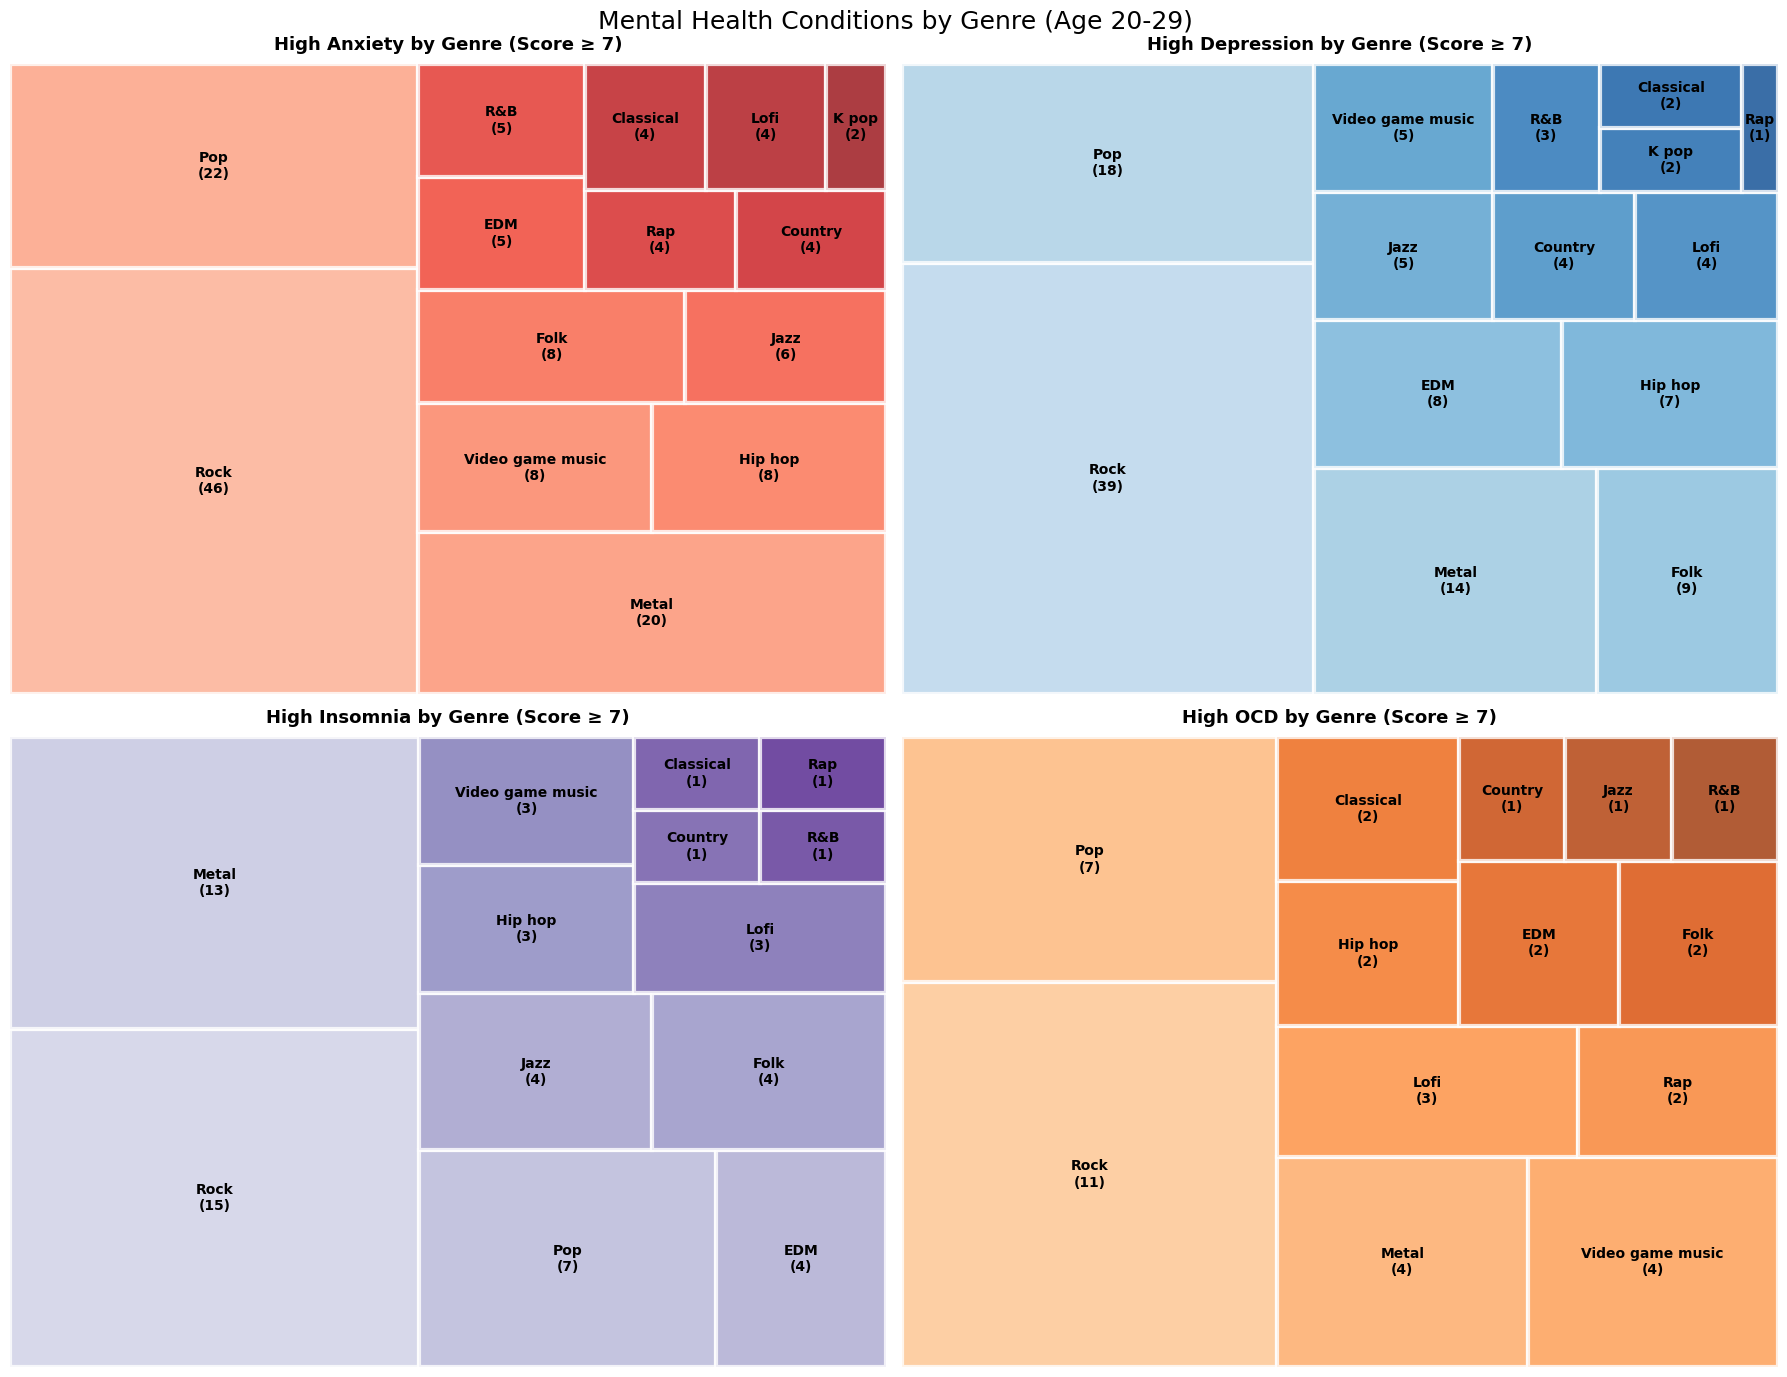

In [11]:
import squarify
conditions = ['Anxiety', 'Depression', 'Insomnia', 'OCD']
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

age_20s = df[df['Age Group'] == '20-29']
color_maps = [plt.cm.Reds, plt.cm.Blues, plt.cm.Purples, plt.cm.Oranges]

for idx, condition in enumerate(conditions):
    ax = axes[idx // 2, idx % 2]
    
    filtered = age_20s[age_20s[condition] >= 7]
    genre_counts = filtered['Fav genre'].value_counts()
    
    colors = color_maps[idx](np.linspace(0.3, 0.9, len(genre_counts)))
    
    squarify.plot(sizes=genre_counts.values,
                  label=[f"{genre}\n({count})" for genre, count in zip(genre_counts.index, genre_counts.values)],
                  color=colors, alpha=0.8, edgecolor='white', linewidth=3, ax=ax,
                  text_kwargs={'fontsize': 10, 'weight': 'bold'})
    
    ax.set_title(f'High {condition} by Genre (Score ≥ 7)', 
                 fontsize=13, weight='bold', pad=10)
    
    ax.axis('off')

fig.suptitle('Mental Health Conditions by Genre (Age 20-29)', fontsize=18)
plt.tight_layout()
plt.show()